# publications

INDEX

In [1]:
# Libraries
import pandas as pd

# Abstract Syntax Trees
import ast

# Functions
import sys
sys.path.append('../src')
from support_clean import *

### Import publications_df

In [2]:
publications = pd.read_csv('../data/publications_df.csv')

In [3]:
constant_columns(publications)

([], [])

In [4]:
to_drop = ['Unnamed: 0', 'status', 'journal_id']

display(publications.shape)
publications = publications.drop(columns=to_drop)
display(publications.shape)

(61981, 18)

(61981, 15)

### EDA

In [5]:
publications.head(2)

,pub_id,last_revision,volume,publication_date,title,pages,DOI,authors,journal,abstract,abstract_words,keywords,terms,pub_type,citation
0,38012702,20231129.0,20.0,2023 Nov 27,"Neuroinflammation, memory, and depression: new...",283,10.1186/s12974-023-02964-x,"['Wu, Anbiao', 'Zhang, Jiyan']",Journal of neuroinflammation,As one of most common and severe mental disord...,"one common severe mental disorders , major dep...","['one', 'common', 'severe', 'mental', 'disorde...","['Hippocampal neurogenesis', 'Major depressive...",Journal Article,J Neuroinflammation. 2023 Nov 27;20(1):283. do...
1,38012669,20231129.0,20.0,2023 Nov 27,OTUD1 ameliorates cerebral ischemic injury thr...,281,10.1186/s12974-023-02968-7,"['Zheng, Shengnan', 'Li, Yiquan', 'Song, Xiaom...",Journal of neuroinflammation,BACKGROUND: Inflammatory response triggered by...,BACKGROUND : Inflammatory response triggered i...,"['background', 'inflammatory', 'response', 'tr...","['Cerebral ischemic injury', 'Inflammation', '...",Journal Article,J Neuroinflammation. 2023 Nov 27;20(1):281. do...


In [6]:
publications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61981 entries, 0 to 61980
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pub_id            61981 non-null  int64  
 1   last_revision     61981 non-null  float64
 2   volume            61591 non-null  float64
 3   publication_date  61981 non-null  object 
 4   title             61981 non-null  object 
 5   pages             61981 non-null  object 
 6   DOI               61981 non-null  object 
 7   authors           61981 non-null  object 
 8   journal           61981 non-null  object 
 9   abstract          61981 non-null  object 
 10  abstract_words    61981 non-null  object 
 11  keywords          61981 non-null  object 
 12  terms             61981 non-null  object 
 13  pub_type          61981 non-null  object 
 14  citation          61981 non-null  object 
dtypes: float64(2), int64(1), object(12)
memory usage: 7.1+ MB


### Protocol for Data Cleansing

     0   pub_id            61981 non-null  int64  
     1   last_revision     61981 non-null  float64 --> datetime
     2   volume            61591 non-null  float64 --> fillna(0) --> int64
     3   publication_date  61981 non-null  object  --> datetime
     4   title             61981 non-null  object 
     5   pages             61981 non-null  object 
     6   DOI               61981 non-null  object  
     7   authors           61981 non-null  object  --> list
     8   journal           61981 non-null  object  --> journal_id
     9   abstract          61981 non-null  object 
     10  abstract_words    61981 non-null  object
     11  keywords          61981 non-null  object  --> list
     12  terms             61981 non-null  object  --> list
     13  pub_type          61981 non-null  object  --> categories
     14  citation          61981 non-null  object 

### Create a column 'publication_year'

In [7]:
publications['publication_date']

0        2023 Nov 27
1        2023 Nov 27
2        2023 Nov 27
3        2023 Nov 27
4        2023 Nov 25
            ...     
61976           2019
61977           2019
61978           2019
61979           2019
61980           2019
Name: publication_date, Length: 61981, dtype: object

In [8]:
publications['publication_year'] = publications['publication_date'].str.extract(r'(\d{4})')

In [9]:
publications['publication_year'].isna().sum()

0

### last_revision & publication_date to datetime

In [10]:
publications[['last_revision', 'publication_date']].head(2)

,last_revision,publication_date
0,20231129.0,2023 Nov 27
1,20231129.0,2023 Nov 27


In [11]:
publications[['last_revision', 'publication_date']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61981 entries, 0 to 61980
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   last_revision     61981 non-null  float64
 1   publication_date  61981 non-null  object 
dtypes: float64(1), object(1)
memory usage: 968.6+ KB


#### last_revision

In [12]:
publications['last_revision'] = pd.to_datetime(publications['last_revision'], format='%Y%m%d').dt.strftime('%Y%m%d')

In [13]:
publications['last_revision'] = pd.to_datetime(publications['last_revision'])

#### publication_date

In [14]:
publications['publication_date'].unique()

array(['2023 Nov 27', '2023 Nov 25', '2023 Nov 24', ..., '2018 Apr-Jun',
       '2016 Oct-Dec', '2024 Sep'], dtype=object)

In [15]:
def parse_date(date_str):
    try:
        return pd.to_datetime(date_str).date()
    except ValueError:
        try:
            return pd.to_datetime(date_str, format='%Y %b', errors='coerce').date()
        except ValueError:
            return pd.NaT

In [16]:
publications['pub_date'] = publications['publication_date'].apply(parse_date)

### Convert object columns to lists
     7   authors           61981 non-null  object  --> list
     11  keywords          61981 non-null  object  --> list
     12  terms             61981 non-null  object  --> list

In [17]:
type(publications['authors'][0])

str

In [18]:
# Transform the strings to lists again
publications['authors'] = publications['authors'].apply(ast.literal_eval)
publications['keywords'] = publications['keywords'].apply(ast.literal_eval)
publications['terms'] = publications['terms'].apply(ast.literal_eval)

### Convert pub_type to categories
    13  pub_type          61981 non-null  object  --> categories

In [19]:
# publications['pub_type'].value_counts()

In [20]:
# Define the categories and their counts
categories = ['Journal Article', 'Comparative Study', 'Clinical Trial', 'Comment', 'Historical Article', 
              'Case Reports', 'Biography', 'Published Erratum', 'Editorial', 'Evaluation Study', 
              'Clinical Trial, Phase II', 'Clinical Trial, Phase III', 'Letter', 'Congress', 'Clinical Study', 
              'Controlled Clinical Trial', 'Clinical Trial, Phase I', 'Systematic Review', 'News', 'Review', 
              'Retraction of Publication', 'Consensus Development Conference', 'Lecture', 'Interview', 
              'Clinical Trial, Phase IV', 'Introductory Journal Article', 'Clinical Trial Protocol', 'Dataset', 
              'Guideline', 'Research Support, Non-U.S. Gov\'t', 'Meta-Analysis', 'Address', 'Equivalence Trial', 
              'Festschrift', 'Duplicate Publication', 'Bibliography', 'Corrected and Republished Article']

# Convert the 'pub_type' column to a categorical type with specified categories
publications['pub_type'] = publications['pub_type'].astype(pd.CategoricalDtype(categories=categories, ordered=False))

In [21]:
publications['pub_type'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 61981 entries, 0 to 61980
Series name: pub_type
Non-Null Count  Dtype   
--------------  -----   
61981 non-null  category
dtypes: category(1)
memory usage: 62.0 KB


### Prepare the column for the foreign key: journal_id
    8   journal           61981 non-null  object  --> journal_id

In [22]:
journals = pd.read_csv('../data/journals_db.csv', index_col=False)
journals = journals.drop(columns='Unnamed: 0')
journals.head(2)

,journal_id,country_id,journal_name,num_articles,region,publisher,coverage,categories,areas,sjr_2010,...,hindex_2020,docs_2020,sjr_2021,quartile_2021,hindex_2021,docs_2021,sjr_2022,quartile_2022,hindex_2022,docs_2022
0,0,756.0,Frontiers of Neurology and Neuroscience,325,Western Europe,S. Karger AG,"2005-2019, 2021",Medicine (miscellaneous) (Q2); Neurology (clin...,Medicine; Neuroscience,"0,456",...,32.0,0.0,"0,199",Q4,32.0,14.0,"0,506",Q3,32.0,0.0
1,1,840.0,PLoS Biology,4651,Northern America,Public Library of Science,2003-2022,Agricultural and Biological Sciences (miscella...,Agricultural and Biological Sciences; Biochemi...,"7,847",...,293.0,348.0,"3,928",Q1,293.0,337.0,"4,005",Q1,293.0,403.0


In [23]:
publications['journal'].head(2)

0    Journal of neuroinflammation
1    Journal of neuroinflammation
Name: journal, dtype: object

In [24]:
# Create a dictionary to unificate journal name and journal_id
display(len(journals))
journal_mapping = dict(zip(journals['journal_name'], journals['journal_id']))
display(len(journal_mapping))

110

110

In [25]:
def add_journal_id(x):
    x = x.lower()
    for k,v in journal_mapping.items():
        if x in k.lower():
            return int(v)

In [33]:
# Rename the journals according with the journal_db
old_names = ['The Neuroscientist : a review journal bringing neurobiology, neurology and ',
             'Journal of physiology, Paris']
new_names = ['Neuroscientist', 'Journal of Physiology Paris']

publications['journal'] = publications['journal'].replace(old_names, new_names)

In [34]:
publications['journal_id'] = publications['journal'].apply(add_journal_id)

In [35]:
publications['journal'][publications['journal_id'].isna()].value_counts()

Series([], Name: count, dtype: int64)

### Manage NaNs
     2   volume            61591 non-null  float64 --> fillna(0) --> int64

In [37]:
publications.isna().sum().sort_values(ascending = False).head(3)

pub_date    654
volume      390
pub_id        0
dtype: int64

In [38]:
# Fill NaN values in 'pub_date' with the corresponding year and January 1
publications['pub_date'] = publications.apply(lambda row: pd.to_datetime(f'{int(row["publication_year"])}-01-01'), axis=1)

In [39]:
publications.isna().sum().sort_values(ascending = False).head(3)

volume            390
pub_id              0
abstract_words      0
dtype: int64

In [41]:
# Check the citations when volume is NaN
publications['citation'][publications['volume'].isna()]

5249     J Neurophysiol. 2023 Nov 15. doi: 10.1152/jn.0...
5250     J Neurophysiol. 2023 Nov 15. doi: 10.1152/jn.0...
5251     J Neurophysiol. 2023 Nov 15. doi: 10.1152/jn.0...
5252     J Neurophysiol. 2023 Nov 15. doi: 10.1152/jn.0...
5253     J Neurophysiol. 2023 Nov 15. doi: 10.1152/jn.0...
                               ...                        
54260    Mol Neurobiol. 2023 Aug 11. doi: 10.1007/s1203...
54261    Mol Neurobiol. 2023 Aug 7. doi: 10.1007/s12035...
54302    Mol Neurobiol. 2023 Jul 27. doi: 10.1007/s1203...
54708    Mol Neurobiol. 2022 Aug 18. doi: 10.1007/s1203...
57673    Mol Neurobiol. 2017 Apr 18. doi: 10.1007/s1203...
Name: citation, Length: 390, dtype: object

In [42]:
publications['volume'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 61981 entries, 0 to 61980
Series name: volume
Non-Null Count  Dtype  
--------------  -----  
61591 non-null  float64
dtypes: float64(1)
memory usage: 484.4 KB


In [43]:
# Fill NaN vith 0.0
publications['volume'] = publications['volume'].fillna(0.0)

### Check the changes

In [44]:
publications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61981 entries, 0 to 61980
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   pub_id            61981 non-null  int64         
 1   last_revision     61981 non-null  datetime64[ns]
 2   volume            61981 non-null  float64       
 3   publication_date  61981 non-null  object        
 4   title             61981 non-null  object        
 5   pages             61981 non-null  object        
 6   DOI               61981 non-null  object        
 7   authors           61981 non-null  object        
 8   journal           61981 non-null  object        
 9   abstract          61981 non-null  object        
 10  abstract_words    61981 non-null  object        
 11  keywords          61981 non-null  object        
 12  terms             61981 non-null  object        
 13  pub_type          61981 non-null  category      
 14  citation          6198

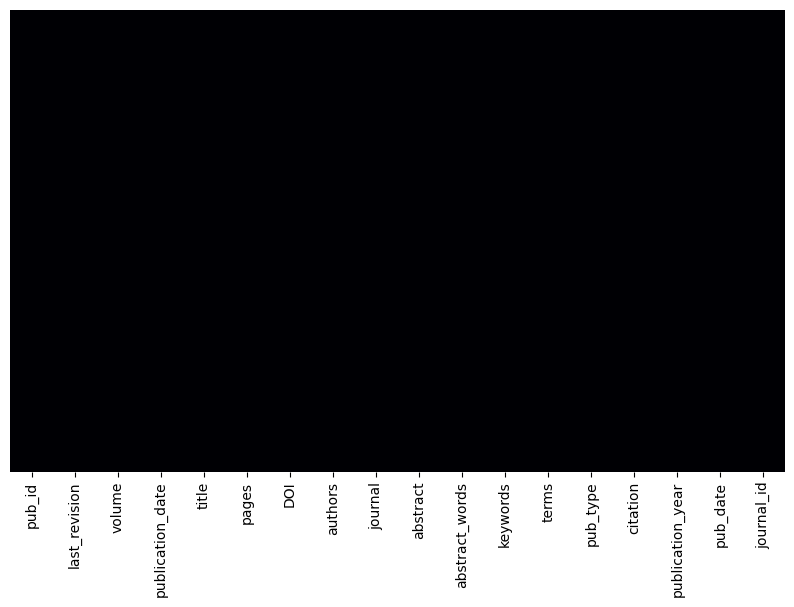

In [47]:
view_nan(publications)

In [48]:
publications.isna().sum().sort_values(ascending = False).head(2)

pub_id           0
last_revision    0
dtype: int64

### Drop Columns

In [46]:
publications.columns

Index(['pub_id', 'last_revision', 'volume', 'publication_date', 'title',
       'pages', 'DOI', 'authors', 'journal', 'abstract', 'abstract_words',
       'keywords', 'terms', 'pub_type', 'citation', 'publication_year',
       'pub_date', 'journal_id'],
      dtype='object')

In [49]:
to_drop = ['publication_date']
display(publications.shape)
publications = publications.drop(columns=to_drop)
display(publications.shape)

(61981, 18)

(61981, 17)

### Change the order of the columns

In [50]:
publications.columns

Index(['pub_id', 'last_revision', 'volume', 'title', 'pages', 'DOI', 'authors',
       'journal', 'abstract', 'abstract_words', 'keywords', 'terms',
       'pub_type', 'citation', 'publication_year', 'pub_date', 'journal_id'],
      dtype='object')

In [51]:
publications = publications[['pub_id', 'journal_id', 'last_revision', 'volume', 'title', 'pages', 'DOI', 'authors',
                             'journal', 'abstract', 'abstract_words', 'keywords', 'terms', 'pub_type', 'citation', 
                             'publication_year', 'pub_date']]

### Export as .csv

In [53]:
publications.to_csv('../data/publications_db.csv')